# Kats 201 - Forecasting with Kats


This tutorial will introduce time series modeling and forecasting with Kats. We will show you how to build forecasts with different Kats models and how to do parameter tuning and backtesting using Kats.  The complete table of contents for Kats 201 is as follows:

1. Forecasting with Kats Base Models     
    1.1 SARIMA     
    1.2 Prophet     
    1.3 Holt-Winters     
2. Forecasting with Kats Ensemble Model
3. Multivariate Model Forecasting
4. Hyperparameter Tuning
5. Backtesting

**Note:** We provide two types of tutorial notebooks
- **Kats 101**, basic data structure and functionalities in Kats 
- **Kats 20x**, advanced topics, including advanced forecasting techniques, advanced detection algorithms, `TsFeatures`, meta-learning, etc. 

# 1. Forecasting with Kats Base Models



In this part, we will demonstrate the forecasting workflow with the following models with `air_passengers` data set:
1. SARIMA
2. Prophet,
3. Holt-Winters


We begin by loading the `air_passengers` data set into a `TimeSeriesData` object.  This code is essentially the same as the code in our introduction to the `TimeSeriesData` object in the Kats 101 Tutorial.

In [1]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter(action='ignore')
sys.path.append("../")

from kats.consts import TimeSeriesData


air_passengers_df = pd.read_csv("/Users/aitor/Desktop/Máster Ciencia de Datos/Series temporales/Series-temporales/data/Class/air_passengers.csv")

# Note: If the column holding the time values is not called time, you will want to specify the name of this column.
air_passengers_df.columns = ["time", "value"]
air_passengers_ts = TimeSeriesData(air_passengers_df)

Because each of our time series models follow the `sklearn` model API pattern, the code for each of the next three examples is quite similar.  We initialize the model with its parameters and then call the `fit` and `predict` methods.  The only difference between each of these examples are the model-specific parameters.  We can then use the `plot` method to visualize our forecast in each case.

The values we choose for each of our paremeters in these examples are basically arbitrary.  Later in this tutorial, we will show you how to pick the right parameters for a model in Kats using hyperparameter tuning.

## 1.1 SARIMA

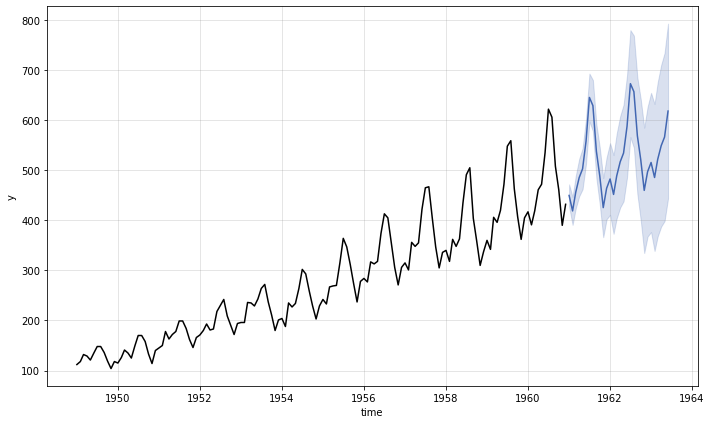

In [2]:
from kats.models.sarima import SARIMAModel, SARIMAParams
warnings.simplefilter(action='ignore')

# create SARIMA param class
# no es autoarima. Le tengo que decir yo cuál es el modelo.
# aquí se lo estamos diciendo todo por eso no es "auto"
params = SARIMAParams(
    # p autorregresivo
    p = 2, 
    # d diferencia
    d=1, 
    # q media movil
    q=1, 
    trend = 'ct', 
    seasonal_order=(1,0,1,12)
    )

# initiate SARIMA model
m = SARIMAModel(data=air_passengers_ts, params=params)

# fit SARIMA model
m.fit()

# generate forecast values
fcst = m.predict(
    steps=30, 
    freq="MS"
    )

# make plot to visualize
m.plot()

In [3]:
m.model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              value   No. Observations:                  144
Model:             SARIMAX(2, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -564.806
Date:                            Tue, 30 Nov 2021   AIC                           1145.612
Time:                                    17:01:49   BIC                           1169.314
Sample:                                         0   HQIC                          1155.243
                                            - 144                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1427      1.944      0.073      0.941      -3.668       3.953
drift          0.0011      0.025      0.042      0.966      -0.048       0.051
ar.L1         -1.2190      0.085    -14.344      0.000      -1.386      -1.052
ar.L2         -0.3007      0.075     -4.035      0.000      -0.447      -0.155
ma.L1          0.9874      0.032     30.859      0.000       0.925       1.050
ar.S.L12       0.9706      0.020     47.486      0.000       0.931       1.011
ma.S.L12      -0.1029      0.113     -0.910      0.363      -0.324       0.119
sigma2       126.9258     13.719      9.252      0.000     100.037     153.815
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                13.44
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               3.82   Skew:                             0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [4]:
fcst

,time,fcst,fcst_lower,fcst_upper
144,1961-01-01,449.684838,427.600392,471.769283
145,1961-02-01,418.736735,390.890012,446.583459
146,1961-03-01,455.984053,423.582463,488.385643
147,1961-04-01,485.446540,448.091165,522.801916
148,1961-05-01,502.833832,462.100318,543.567346
149,1961-06-01,558.229931,513.494230,602.965633
150,1961-07-01,645.399039,597.733301,693.064776
151,1961-08-01,629.082735,578.037539,680.127932
152,1961-09-01,537.834237,484.135580,591.532893
153,1961-10-01,488.891212,432.234039,545.548386


## 1.2 Prophet
Note: This example requires `fbprophet` be installed, for example with `pip install kats[prophet]` or `pip install kats[all]`


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -2.46502
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       501.164    0.00404329       133.096      0.7795      0.7795      135   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       503.029    0.00011625       61.0812      0.7463      0.7463      258   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       503.241   0.000197464       74.1894      0.6815      0.6815      384   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     376       503.429   0.000269211       170.518   3.444e-06       0.001      512  LS failed, Hessian reset 
     399       503.521    0.00012352       74.8921      0.4361      0.4361      542   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     428       503.524   4.87946e-06    

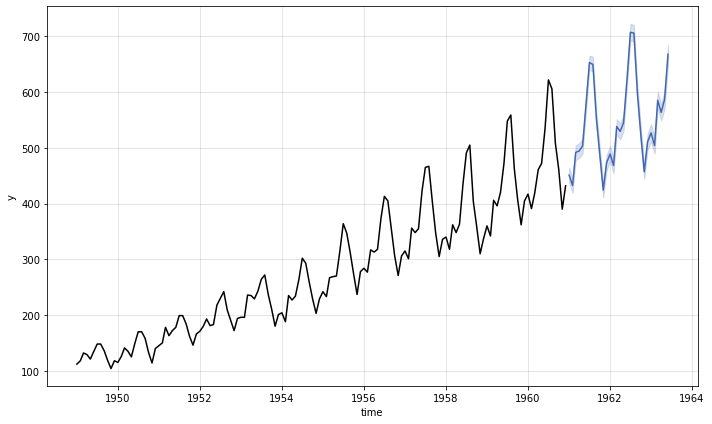

In [5]:
# hacemos lo mismo con prophet
# vemos la diferencia con los intervalos de confianza. En este caso son menores que el ARIMA

# import the param and model classes for Prophet model
from kats.models.prophet import ProphetModel, ProphetParams

# create a model param instance
params = ProphetParams(seasonality_mode='multiplicative') # additive mode gives worse results

# create a prophet model instance
m = ProphetModel(air_passengers_ts, params)

# fit model simply by calling m.fit()
m.fit()

# make prediction for next 30 month
fcst = m.predict(steps=30, freq="MS")

# plot to visualize
m.plot()

## 1.3 Holt-Winters

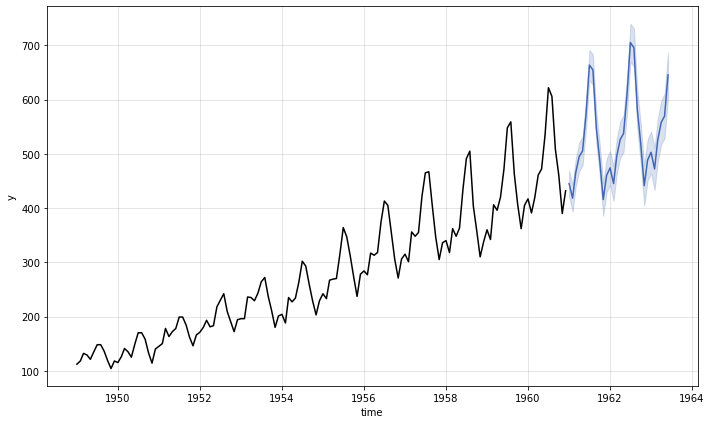

In [7]:
from kats.models.holtwinters import HoltWintersParams, HoltWintersModel
warnings.simplefilter(action='ignore')


params = HoltWintersParams(
    # tendencia aditiva
            trend="add",
            #damped=False,
    # multiplicativa
            seasonal="mul",
            seasonal_periods=12,
        )
m = HoltWintersModel(
    data=air_passengers_ts, 
    params=params)

m.fit()
fcst = m.predict(steps=30, alpha = 0.1)
m.plot()

# 2. Forecasting with Ensemble model

`KatsEnsemble` is an ensemble forecasting model, which means it allows you to combine several different forecasting models when building a forecast.  When creating an ensemble, you specify the list of models (with parameters) that you wish to include in the ensemble, and then you choose whether to aggregate these forecasts using the median or the weighted average.  Prior to building any forecasts, the model checks for seasonality and if seasonality is detected, it performs an STL decomposition (using either additive or multiplicative decomposition, as specified by the user).  Each of the forecasting models specified to the ensemble model are only applied to the the de-seasonalized components, and after these forecasts are aggregated the result is reseasonalized.

When we initialize `KatsEnsemble`, we include a dictionary with the following components:  

* **models:** `EnsembleParams`, contains a list of parameters for each of the individual model parameters     
* **aggregation:** 'str', either 'median' or 'weightedavg', how to aggregate the individual forecasts to build an ensemble      
* **seasonality_length:** int, the length of the seasonality of the time series      
* **decomposition_method** str, either  'multiplicative' or 'additive', the type of decomposition of the initial time series

In the example below, we use the `air_passengers` data set to build a median ensemble forecast that combines 6 different forecasting models.  We use the `EnsembleParams` object to define the parameters for each of these models.  Then generating a forecast for this ensemble is straightforward.

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.24449D+00    |proj g|=  1.85003D-03

At iterate    5    f=  3.24446D+00    |proj g|=  6.54143D-05

At iterate   10    f=  3.24446D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     12      1     0     0   0.000D+00   3.244D+00
  F =   3.2444586567513340     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -2.31596
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       504.005    0.00783455        492.11      0.9137      0.9137      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     148       506.614   0.000466198       195.563    2.71e-06       0.001      226  LS failed, Hessian reset 
     199       508.089   0.000193109       124.065      0.4293      0.4293      285   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     237       510.352    0.00031351       143.371   4.044e-06       0.001      369  LS failed, Hessian reset 
     299       511.321    0.00387853       189.467      0.3777           1      448   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       513.368   0.000518212        105.17       0.309           1      565   
    Iter      log pro

/Users/aitor/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning:

fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.

/Users/aitor/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning:

After 0.13 initialization must be handled at model creation

/Users/aitor/opt/anaconda3/lib/python3.8/site-packages/kats/models/theta.py:121: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.

/Users/aitor/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning:

fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning

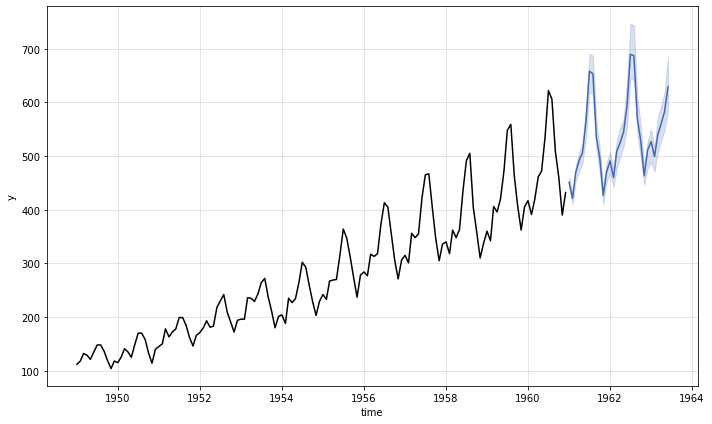

In [8]:
from kats.models.ensemble.ensemble import EnsembleParams, BaseModelParams
from kats.models.ensemble.kats_ensemble import KatsEnsemble
from kats.models import (
    arima,
    holtwinters,
    linear_model,
    prophet,  # requires fbprophet be installed
    quadratic_model,
    sarima,
    theta,
)

# we need define params for each individual forecasting model in `EnsembleParams` class
# here we include 6 different models

# definimos el modelo
model_params = EnsembleParams(
            [
                BaseModelParams("arima", arima.ARIMAParams(p=1, d=1, q=1)),
                BaseModelParams(
                    "sarima",
                    sarima.SARIMAParams(
                        p=2,
                        d=1,
                        q=1,
                        trend="ct",
                        seasonal_order=(1, 0, 1, 12),
                        enforce_invertibility=False,
                        enforce_stationarity=False,
                    ),
                ),
                BaseModelParams("prophet", prophet.ProphetParams()),  # requires fbprophet be installed
                BaseModelParams("linear", linear_model.LinearModelParams()),
                BaseModelParams("quadratic", quadratic_model.QuadraticModelParams()),
                BaseModelParams("theta", theta.ThetaParams(m=12)),
            ]
        )

# create `KatsEnsembleParam` with detailed configurations 
# definimos los parámetros
KatsEnsembleParam = {
    "models": model_params,
    # agregación hazlo por la mediana
    "aggregation": "median",
    "seasonality_length": 12,
    # método de descomposición multiplicativo
    "decomposition_method": "multiplicative",
}

# create `KatsEnsemble` model
m = KatsEnsemble(
    data=air_passengers_ts, 
    params=KatsEnsembleParam
    )

# fit and predict
m.fit()

# predict for the next 30 steps
fcst = m.predict(steps=30)

# aggregate individual model results
m.aggregate()

# plot to visualize
m.plot()


# nos faltaría poner métricas para ver cual predice mejor. Si este, o los anteriores.
# El problema es que hya que decidir el modelo.

# 3. Multivariate Model Forecasting

Vector autoregression (VAR) is a multivariable forecasting algorithm that is supported in Kats.  Here, we show show an example of how to use the `VARModel` with the `multi_ts` data set.  We begin by loading the data set into a `TimeSeriesData` and previewing it.

In [9]:
multi_df = pd.read_csv("/Users/aitor/Desktop/Máster Ciencia de Datos/Series temporales/Series-temporales/data/Class/multi_ts.csv")
multi_ts = TimeSeriesData(multi_df[['time','V1', 'V2']])


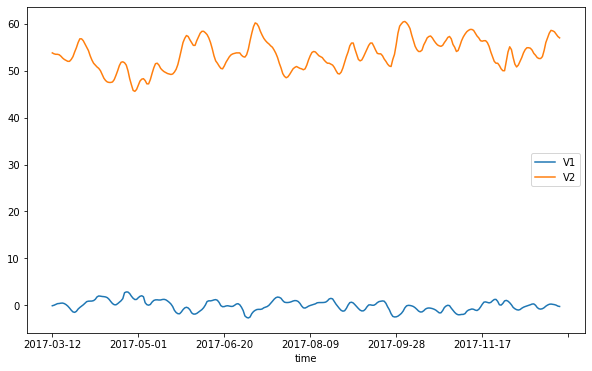

In [10]:
multi_df.groupby('time').sum()[['V1', 'V2']].plot(figsize=(10, 6))
plt.show()

Now it is straightforward to build this forecast using `VARModel` and plot the results as follows.

In [11]:
multi_ts

,time,V1,V2
0,2017-03-12,-0.109,53.8
1,2017-03-13,0.000,53.6
2,2017-03-14,0.178,53.5
3,2017-03-15,0.339,53.5
4,2017-03-16,0.373,53.4
...,...,...,...
291,2017-12-28,0.195,58.5
292,2017-12-29,0.131,58.3
293,2017-12-30,0.017,57.8
294,2017-12-31,-0.182,57.3


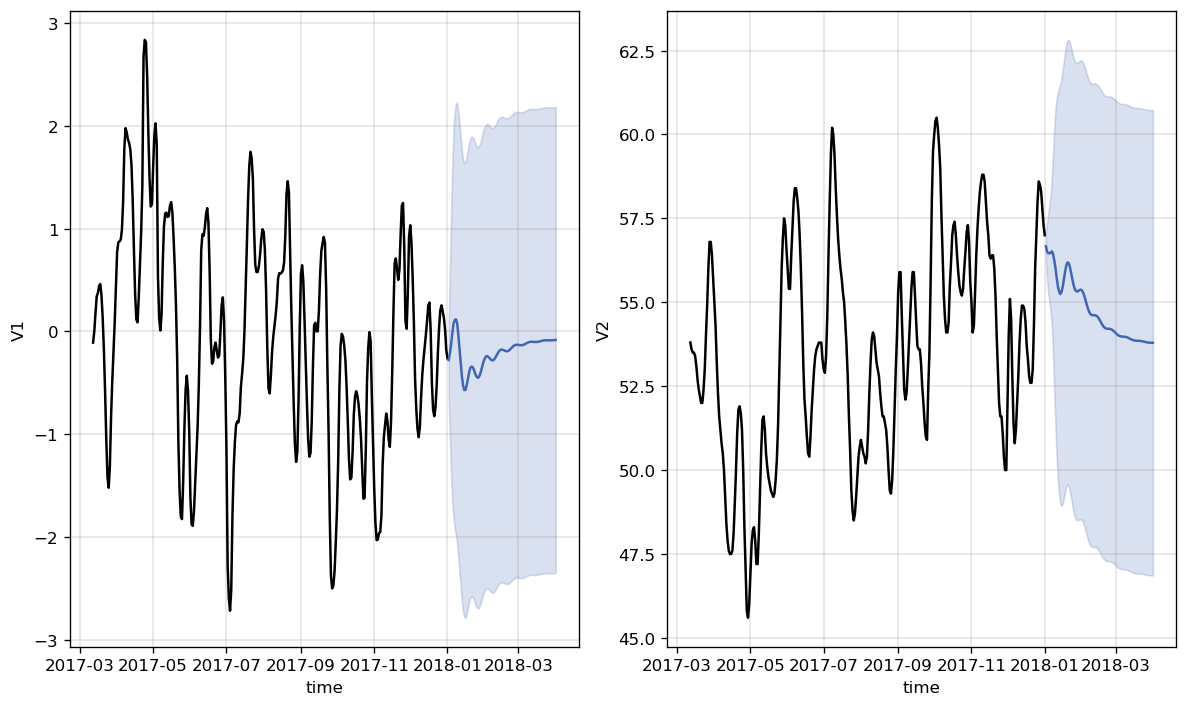

In [12]:
# Use VAR model to forecast this multivariate time series
from kats.models.var import VARModel, VARParams

# aquí selecciona él el VAR.
params = VARParams()
m = VARModel(multi_ts, params)
m.fit()
fcst = m.predict(steps=90)

m.plot()
plt.show()

# 4. Hyperparameter tuning

To identify which hyperparameters to use for a specfied forecasting model, we have classes in Kats that allow you to efficiently identify the best hyperparameters.  Here we will provide an exmaple of how to do hyperparameter tuning for an ARIMA model that using the `air_passengers` data set.
NOTE: This example requires ax-platform be installed. For example, `pip install ax-platform` or `pip install kats[all]`.

In [14]:
import kats.utils.time_series_parameter_tuning as tpt
from kats.consts import ModelEnum, SearchMethodEnum, TimeSeriesData
from kats.models.arima import ARIMAParams, ARIMAModel

from ax.core.parameter import ChoiceParameter, FixedParameter, ParameterType
from ax.models.random.sobol import SobolGenerator
from ax.models.random.uniform import UniformGenerator
warnings.simplefilter(action='ignore')

The method we use to hyperparameter-tuning is a static method called `create_search_method`.  To call this method, we need to specify the type of search we are doing and the search space for the parameters.  We specify the search space for the parameters by defining a dictionary for each parameter and combining these dictionaries into a list.  Here we are specifying that we want to look at all ARIMA(p,d,q) models where the values p, d, and q are either 1 or 2.

In [ ]:
# esto es lo más interesante. 
# Cómo hace él para seleccionar el modelo ARIMA?
# ahora lo que vamos a hacer es coger un modelo y hacer predicción. Nosotros utilizábamos el AIC. 
# y en este caso, lo que nos seleccionará el modelo será aquel que mejor predice. En vez de hacer sobre el AIC
# como nosotros haciamos. nosotros cogíamos el conjunto de training y minimizábamos el AIC

In [15]:
# creamos el grid. A la p,q y d les damos los valores entre 1 y 3
parameters_grid_search = [
{
    "name": "p",
    "type": "choice",
    "values": list(range(1, 3)),
    "value_type": "int",
    "is_ordered": True,
},
{
    "name": "d",
    "type": "choice",
    "values": list(range(1, 3)),
    "value_type": "int",
    "is_ordered": True,
},
{
    "name": "q",
    "type": "choice",
    "values": list(range(1, 3)),
    "value_type": "int",
    "is_ordered": True,
},
]

Now, we are going to create a grid search with these parameters.  The full list of arguments of the `create_search_method` are as follows:
* **Parameters:** List[Dict], this is a list of dictionaries, where each dictionary gives the search space for a parameter      
* **selected_search_method:** SearchMethodEnum, the type of search method used to do parameter tuning
* **objective_name:** str, the nume of the objective function used for the search (this is arbitrary)

In [16]:
# aquí le decimos el método de búsqueda
parameter_tuner_grid = tpt.SearchMethodFactory.create_search_method(
    objective_name="evaluation_metric",
    parameters=parameters_grid_search,
    selected_search_method=SearchMethodEnum.GRID_SEARCH,
)

[WARNING 11-30 17:14:37] ax.core.parameter: `sort_values` is not specified for `ChoiceParameter` "p". Defaulting to `True` for parameters of `ParameterType` INT. To override this behavior (or avoid this warning), specify `sort_values` during `ChoiceParameter` construction.
[WARNING 11-30 17:14:37] ax.core.parameter: `sort_values` is not specified for `ChoiceParameter` "d". Defaulting to `True` for parameters of `ParameterType` INT. To override this behavior (or avoid this warning), specify `sort_values` during `ChoiceParameter` construction.
[WARNING 11-30 17:14:37] ax.core.parameter: `sort_values` is not specified for `ChoiceParameter` "q". Defaulting to `True` for parameters of `ParameterType` INT. To override this behavior (or avoid this warning), specify `sort_values` during `ChoiceParameter` construction.
[WARNING 11-30 17:14:37] ax.core.parameter: `sort_values` is not specified for `ChoiceParameter` "p". Defaulting to `True` for parameters of `ParameterType` INT. To override this

Now that we have defined our search grid, we need to define the metric we are calculating at each point on the grid.  Given a set of parameters p, q, and d, we define our evaluation function to be mean absolute error (MAE) of the forecast for the test data set (using an 80/20 training-test split) using these respective parameters.

In [20]:
# Divide into an 80/20 training-test split

# ahora hago el split de training y testing
split = int(0.8*len(air_passengers_df))

train_ts = air_passengers_ts[0:split]
test_ts = air_passengers_ts[split:]

# Fit an ARIMA model and calculate the MAE for the test data
# le digo que haga la evaluación del modelo ARIMA para los parámetros
def evaluation_function(params):
    arima_params = ARIMAParams(
        p = params['p'],
        d = params['d'],
        q = params['q']
    )
    model = ARIMAModel(train_ts, arima_params)
    model.fit()
    model_pred = model.predict(steps=len(test_ts))
    # calcula el MAE
    error = np.mean(np.abs(model_pred['fcst'].values - test_ts.value.values))
    return error

# se puede hacer el modelo con logaritmo y el sin logaritmo serparado

Now that we have our grid and our evaluation functions defined, we can display our evaluation metric for each point on the grid using the following function calls.

In [21]:
parameter_tuner_grid.generate_evaluate_new_parameter_values(
    evaluation_function=evaluation_function
)

# Retrieve parameter tuning results

parameter_tuning_results_grid = (
    parameter_tuner_grid.list_parameter_value_scores()
)

parameter_tuning_results_grid

[WARNING 11-30 17:16:58] ax.core.parameter: `sort_values` is not specified for `ChoiceParameter` "p". Defaulting to `True` for parameters of `ParameterType` INT. To override this behavior (or avoid this warning), specify `sort_values` during `ChoiceParameter` construction.
[WARNING 11-30 17:16:58] ax.core.parameter: `sort_values` is not specified for `ChoiceParameter` "d". Defaulting to `True` for parameters of `ParameterType` INT. To override this behavior (or avoid this warning), specify `sort_values` during `ChoiceParameter` construction.
[WARNING 11-30 17:16:58] ax.core.parameter: `sort_values` is not specified for `ChoiceParameter` "q". Defaulting to `True` for parameters of `ParameterType` INT. To override this behavior (or avoid this warning), specify `sort_values` during `ChoiceParameter` construction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.60915D+00    |proj g|=  2.27987D-03

At iterate    5    f=  4.60892D+00    |proj g|=  1.77369D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     14      1     0     0   0.000D+00   4.609D+00
  F =   4.6089239505266324     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 v


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  4.54237D+00    |proj g|=  5.96856D-05

At iterate   20    f=  4.54237D+00    |proj g|=  6.98108D-05

At iterate   25    f=  4.54237D+00    |proj g|=  2.93099D-06

At iterate   30    f=  4.54237D+00    |proj g|=  2.66454D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     31     42      1     0     0   1.776D-07   4.542D+00
  F =   4.5423666103495899     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   25    f=  4.54032D+00    |proj g|=  1.79412D-05

At iterate   30    f=  4.54032D+00    |proj g|=  5.32907D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     30     44      1     0     0   5.329D-07   4.540D+00
  F =   4.5403206641786147     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.67019D+00    |proj g|=  1.29819D-01

At iterate    5    f=  4.66352D+00    |proj g|=  1.21325D-04

       

 This problem is unconstrained.


,arm_name,metric_name,mean,sem,trial_index,parameters
0,0_0,evaluation_metric,115.202467,0.0,0,"{'p': 1, 'd': 1, 'q': 1}"
1,0_1,evaluation_metric,54.991707,0.0,0,"{'p': 1, 'd': 1, 'q': 2}"
2,0_2,evaluation_metric,183.318591,0.0,0,"{'p': 1, 'd': 2, 'q': 1}"
3,0_3,evaluation_metric,157.333093,0.0,0,"{'p': 1, 'd': 2, 'q': 2}"
4,0_4,evaluation_metric,52.021768,0.0,0,"{'p': 2, 'd': 1, 'q': 1}"
5,0_5,evaluation_metric,56.345614,0.0,0,"{'p': 2, 'd': 1, 'q': 2}"
6,0_6,evaluation_metric,141.107596,0.0,0,"{'p': 2, 'd': 2, 'q': 1}"
7,0_7,evaluation_metric,165.195947,0.0,0,"{'p': 2, 'd': 2, 'q': 2}"


In [ ]:
# 3l mejor es el p=2, d=1 y q=1. Y ahora deberíamos calcular el ARIMA con esos parámetros. 
# estamos seleccionando el modelo en función del error

From the calculations in the table above, we can conclude that ARIMA(2,1,1) has the minimal error of 52.02.

# 5. Backtesting

Kats provides a backtesting module that makes it easy to to compare and evaluate different forecasting models.  While our hyperparameter tuning module allows you to compare different sets of parameters for a single base forecasting model, backtesting allows you to compare different types of base models (with pre-specified parameters).  

Our backtesting module allows you to look at multiple error metrics in a single function call.  Here are the error metrics that are currently supported:
* Mean Absolute Error (MAE)
* Mean Absolute Percentage Error (MAPE)
* Symmetric Mean Absolute Percentage Error (SMAPE)
* Mean Squared Error (MSE)
* Mean Absolute Scaled Error (MASE)
* Root Mean Squared Error (RMSE)

Our example below shows how you can use the `BackTesterSimple` class to compare errors between an ARIMA model and a Prophet model using the `air_passengers` data set.

In [22]:
from kats.utils.backtesters import BackTesterSimple
from kats.models.arima import ARIMAModel, ARIMAParams

backtester_errors = {}

Here, we define a backtester to look at each of the supported error metrics for an ARIMA(2,1,1) model.  We specify in the `BackTesterSimple` definition that we are using a 75/25 training-test split to train and evaluate the metrics for this model

In [23]:
params = ARIMAParams(p=2, d=1, q=1)
ALL_ERRORS = ['mape', 'smape', 'mae', 'mase', 'mse', 'rmse']

backtester_arima = BackTesterSimple(
    error_methods=ALL_ERRORS,
    data=air_passengers_ts,
    params=params,
    train_percentage=75,
    test_percentage=25, 
    model_class=ARIMAModel)

backtester_arima.run_backtest()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.48894D+00    |proj g|=  1.21128D-02

At iterate    5    f=  4.48293D+00    |proj g|=  4.08535D-03

At iterate   10    f=  4.48156D+00    |proj g|=  1.99174D-03

At iterate   15    f=  4.48151D+00    |proj g|=  6.38511D-04

At iterate   20    f=  4.48151D+00    |proj g|=  4.42313D-05

At iterate   25    f=  4.48151D+00    |proj g|=  3.84581D-05

At iterate   30    f=  4.48151D+00    |proj g|=  1.50990D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.


After we run the backtester, the `errors` attribute will be a dictionary mapping each error type name to a its corresponding value

In [24]:
backtester_errors['arima'] = {}
for error, value in backtester_arima.errors.items():
    backtester_errors['arima'][error] = value

Now we run another backteseter to caluculate the same error metrics for a Prophet model.

In [25]:
params_prophet = ProphetParams(seasonality_mode='multiplicative') # additive mode gives worse results

backtester_prophet = BackTesterSimple(
    error_methods=ALL_ERRORS,
    data=air_passengers_ts,
    params=params_prophet,
    train_percentage=75,
    test_percentage=25, 
    model_class=ProphetModel)

backtester_prophet.run_backtest()

backtester_errors['prophet'] = {}
for error, value in backtester_prophet.errors.items():
    backtester_errors['prophet'][error] = value

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -2.35721
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        382.81    0.00216413       228.051       5.521      0.5521      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       384.905   0.000202403       73.3336       0.481           1      249   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       385.126   0.000114099       79.0196      0.2671           1      375   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     349       385.152     1.411e-06        59.148   2.106e-08       0.001      484  LS failed, Hessian reset 
     399       385.152   5.13538e-06       88.8056           1           1      555   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     412       385.155   1.27237e-05    

Here we can compare the error metrics for the two models.

In [26]:
# comparo el arima con el prophet

pd.DataFrame.from_dict(backtester_errors)

,arima,prophet
mape,0.120352,0.073343
smape,0.124585,0.069898
mae,54.349098,29.219968
mase,2.674956,1.438149
mse,5052.735931,1103.835150
rmse,71.082599,33.224015


In [28]:
# cojo el mejor ARIMA y el mejor Prophet. Para comparar los dos modelos hago backtesting:
# que es eso? cojo toda la muestra y calculo el modelo para toda la muestra y calculo medidas de error para toda
# la muestra

# podemos hacer también la comparación con el testing pero cuidado porque puede haber overfitting